# Aplicação de Regressão no Modelo
#### Pergunta: Como a variável renda, a taxa de analfabetização e distância em relação ao centro influenciam na quantidade de crimes em determinados bairros?




#### Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data/consulta-indices-bairros.csv`

In [193]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/consulta-indices-bairros.csv', sep = ';', encoding='latin-1')
df.head(n=15)

,Variável,Ano,Abranches,Água Verde,Ahú,Alto Boqueirão,Alto da Glória,Alto da Rua XV,Atuba,Augusta,...,Sí­tio Cercado,Taboão,Tarumã,Tatuquara,Tingui,Uberaba,Umbará,Vila Izabel,Vista Alegre,Xaxim
0,População Censitária - Total (Habitante),2010.0,13.189,51.425,11.506,53.671,5.548,8.531,15.935,6.598,...,115.525,3.396,8.072,52.780,12.319,72.056,18.730,11.610,11.199,57.182
1,Classe de Rendimento - Pessoas de 10 Anos ou M...,2010.0,3.533,12.044,2.920,14.447,1.318,1.936,4.097,1.798,...,31.281,763,2.155,14.962,3.065,19.815,5.421,2.876,2.947,15.940
2,Rendimento Nominal Mensal Médio das Pessoas de...,2010.0,"1.179,72","3.170,07","3.054,92","867,36","3.054,18","2.854,97","1.203,26","731,64",...,"726,28","1.381,97","2.100,23","590,06","1.370,39","1.101,82","762,65","2.467,22","2.036,11","1.040,56"
3,Rendimento Nominal Mensal Mediano das Pessoas ...,2010.0,"650,00","1.511,00","1.500,00","650,00","2.000,00","1.500,00","700,00","520,00",...,"600,00","700,00","1.000,00","510,00","800,00","600,00","600,00","1.500,00","810,00","700,00"
4,Empregos - Total (Habitante),2010.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,"PIB (R$1.000,00) (Real)",2010.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,"PIB - Per Capita (R$1,00) (Real)",2010.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Alfabetização - Taxa de Analfabetismo - Total ...,2010.0,"3,71","0,82","0,87","3,36","0,84","0,99","3,50","4,85",...,"4,44","4,10","2,24","6,11","1,97","3,51","4,37","1,15","1,87","3,07"
8,IDHM - Geral (Unidade),2010.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,IDHM - Renda (Unidade),2010.0,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Transpor o dataset e dropar as colunas que não tem existem valores

In [194]:
from operator import concat

df_test = df.transpose()
df_test
#df_decade['new_col'] = concat(df_decade['Year'].astype(str).str[0], df_decade['Year'].astype(str).str[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Variável,População Censitária - Total (Habitante),Classe de Rendimento - Pessoas de 10 Anos ou M...,Rendimento Nominal Mensal Médio das Pessoas de...,Rendimento Nominal Mensal Mediano das Pessoas ...,Empregos - Total (Habitante),"PIB (R$1.000,00) (Real)","PIB - Per Capita (R$1,00) (Real)",Alfabetização - Taxa de Analfabetismo - Total ...,IDHM - Geral (Unidade),IDHM - Renda (Unidade),IDHM - Longevidade (Unidade),IDHM - Educação (Unidade),IFDM - Geral (Unidade),IFDM - Educação (Unidade),IFDM - Saúde (Unidade),IFDM - Emprego e Renda (Unidade),Índice de Gini (Unidade),<br/><br/>
Ano,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,NaN
Abranches,13.189,3.533,"1.179,72","650,00",...,...,...,"3,71",...,...,...,...,...,...,...,...,...,NaN
Água Verde,51.425,12.044,"3.170,07","1.511,00",...,...,...,"0,82",...,...,...,...,...,...,...,...,...,NaN
Ahú,11.506,2.920,"3.054,92","1.500,00",...,...,...,"0,87",...,...,...,...,...,...,...,...,...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uberaba,72.056,19.815,"1.101,82","600,00",...,...,...,"3,51",...,...,...,...,...,...,...,...,...,NaN
Umbará,18.730,5.421,"762,65","600,00",...,...,...,"4,37",...,...,...,...,...,...,...,...,...,NaN
Vila Izabel,11.610,2.876,"2.467,22","1.500,00",...,...,...,"1,15",...,...,...,...,...,...,...,...,...,NaN
Vista Alegre,11.199,2.947,"2.036,11","810,00",...,...,...,"1,87",...,...,...,...,...,...,...,...,...,NaN


Tiro as colunas que não tem valores, e tiro a coluna de ano (2010), tendo em mente que os dados são de 2010. Também coloco o nome da coluna como a primeira linha (o header ficou como a primeira linha após a transposição)

In [195]:
#df_test = df_test.set_index('Variável')
df_test = df_test.drop([4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], axis=1)
df_test = df_test.drop(['Ano'])
#df_test.reset_index()

df_test.index = df_test.index.map(str.upper)
df_test = df_test.rename(columns=df_test.iloc[0])
df_test = df_test.tail(df_test.shape[0] -1)
df_test

# list(df_test.columns.values)
# df_test
# df_test['Decade'] = df_test['Year']/10
# df_test = df_test.astype({'Decade':'int'})
# df_test['Decade'] = df_test['Decade']*10

# df_test = df_test.groupby(['Entity', 'Decade']).mean()
# df_test.pop('Year')
# df_test['Total including LUCF'] = df_test['Total including LUCF']*10^6


,População Censitária - Total (Habitante),Classe de Rendimento - Pessoas de 10 Anos ou Mais de Idade - Sem Rendimento (Habitante),Rendimento Nominal Mensal Médio das Pessoas de 10 Anos ou Mais de Idade - Total (Real),Rendimento Nominal Mensal Mediano das Pessoas de 10 Anos ou Mais de Idade - Total (Real),Alfabetização - Taxa de Analfabetismo - Total (Percentual)
ABRANCHES,13.189,3.533,"1.179,72","650,00","3,71"
ÁGUA VERDE,51.425,12.044,"3.170,07","1.511,00","0,82"
AHÚ,11.506,2.920,"3.054,92","1.500,00","0,87"
ALTO BOQUEIRÃO,53.671,14.447,"867,36","650,00","3,36"
ALTO DA GLÓRIA,5.548,1.318,"3.054,18","2.000,00","0,84"
...,...,...,...,...,...
UBERABA,72.056,19.815,"1.101,82","600,00","3,51"
UMBARÁ,18.730,5.421,"762,65","600,00","4,37"
VILA IZABEL,11.610,2.876,"2.467,22","1.500,00","1,15"
VISTA ALEGRE,11.199,2.947,"2.036,11","810,00","1,87"


Junto os 2 datasets por meio do merge, além disso, preciso alterar para Upper para conseguir fazer o join

In [196]:
df_2 = pd.read_csv('../data/analise_crime_filtrado.csv', sep = ',')
df_juncao = pd.merge(df_2, df_test,left_on="ATENDIMENTO_BAIRRO_NOME", right_index=True)
df_juncao.rename(columns = {'População Censitária - Total (Habitante)':'POPULACAO_TOTAL', 'Classe de Rendimento - Pessoas de 10 Anos ou Mais de Idade - Sem Rendimento (Habitante)':'CLASSE_DE_RENDIMENTO', 'Rendimento Nominal Mensal Médio das Pessoas de 10 Anos ou Mais de Idade - Total (Real)':'RENDIMENTO_MENSAL_MEDIO', 'Rendimento Nominal Mensal Mediano das Pessoas de 10 Anos ou Mais de Idade - Total (Real)':'RENDIMENTO_MENSAL_MEDIANO', 
                            'Alfabetização - Taxa de Analfabetismo - Total (Percentual)': 'TAXA_ANALFABETISMO' }, inplace = True)
df_juncao

,OCORRENCIA_CODIGO,NATUREZA1_DESCRICAO,NATUREZA,ATENDIMENTO_BAIRRO_NOME,REGIONAL_FATO_NOME,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_HORA_SEM_MINUTO,OCORRENCIA_MES,OCORRENCIA_DIA_SEMANA,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE,POPULACAO_TOTAL,CLASSE_DE_RENDIMENTO,RENDIMENTO_MENSAL_MEDIO,RENDIMENTO_MENSAL_MEDIANO,TAXA_ANALFABETISMO
0,5122.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-03-13 09:20:00.000,09:20:00,9,3.0,SEXTA,2009-03-13,0.0,-25.426683,-49.272357,57.182,15.940,"1.040,56","700,00","3,07"
348,5396.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-03-16 13:15:00.000,13:15:00,13,3.0,SEGUNDA,2009-03-16,0.0,-25.426683,-49.272357,57.182,15.940,"1.040,56","700,00","3,07"
349,12731.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-07-11 09:15:00.000,09:15:00,9,7.0,SÁBADO,2009-07-11,0.0,-25.426683,-49.272357,57.182,15.940,"1.040,56","700,00","3,07"
350,12761.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-07-11 23:15:00.000,23:15:00,23,7.0,SÁBADO,2009-07-11,0.0,-25.426683,-49.272357,57.182,15.940,"1.040,56","700,00","3,07"
351,13105.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-07-17 14:15:00.000,14:15:00,14,7.0,SEXTA,2009-07-17,0.0,-25.426683,-49.272357,57.182,15.940,"1.040,56","700,00","3,07"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31994,379757.0,Embriaguez,RISCO_VIDA,CASCATINHA,SANTA FELICIDADE,2021.0,2021-12-12 18:39:00.000,18:39:00,18,12.0,DOMINGO,2021-12-12,0.0,-25.409184,-49.323670,2.161,528,"2.222,34","1.000,00","1,80"
51084,374926.0,Agressão física/verbal,AGRESSAO,CASCATINHA,SANTA FELICIDADE,2021.0,2021-11-07 15:21:00.000,15:21:00,15,11.0,DOMINGO,2021-11-07,0.0,-25.409179,-49.308767,2.161,528,"2.222,34","1.000,00","1,80"
53632,160485.0,Agressão física/verbal,AGRESSAO,CASCATINHA,SANTA FELICIDADE,2015.0,2015-10-30 20:59:00.000,20:59:00,20,10.0,SEXTA,2015-10-30,0.0,-25.413980,-49.310680,2.161,528,"2.222,34","1.000,00","1,80"
53634,177999.0,Roubo,ROUBO,CASCATINHA,SANTA FELICIDADE,2016.0,2016-08-12 23:57:00.000,23:57:00,23,8.0,SEXTA,2016-08-12,0.0,-25.413980,-49.310680,2.161,528,"2.222,34","1.000,00","1,80"


Contar a quantidade de roubos em cada Bairro e mostrar na tabela.

In [197]:
df_bairro_crimes = df_juncao.groupby(['ATENDIMENTO_BAIRRO_NOME', 'POPULACAO_TOTAL', 'RENDIMENTO_MENSAL_MEDIO', 'TAXA_ANALFABETISMO']).size().rename('TOTAL_POR_BAIRRO')
df_bairro_crimes = df_bairro_crimes.reset_index().sort_values(by='TOTAL_POR_BAIRRO', ascending=False)
df_bairro_crimes['POPULACAO_TOTAL'] = df_bairro_crimes['POPULACAO_TOTAL'].str.replace('.', '', regex=True)
df_bairro_crimes


,ATENDIMENTO_BAIRRO_NOME,POPULACAO_TOTAL,RENDIMENTO_MENSAL_MEDIO,TAXA_ANALFABETISMO,TOTAL_POR_BAIRRO
20,CENTRO,37283,"2.393,49","0,94",9259
21,CIDADE INDUSTRIAL DE CURITIBA,172822,"779,67","4,34",2994
14,CAJURU,96200,"873,67","4,64",2969
35,PINHEIRINHO,50401,"844,62","3,95",1214
44,XAXIM,57182,"1.040,56","3,07",1174
31,NOVO MUNDO,44063,"1.231,25","2,93",982
24,FAZENDINHA,28074,"984,18","3,64",964
39,TATUQUARA,52780,"590,06","6,11",952
27,HAUER,13315,"1.336,02","1,94",770
4,BACACHERI,23734,"2.216,40","1,27",766


In [198]:
df_bairro_crimes = df_bairro_crimes.astype({'POPULACAO_TOTAL':'int'})
df_bairro_crimes['CRIMINALIDADE'] = df_bairro_crimes['TOTAL_POR_BAIRRO']/ df_bairro_crimes['POPULACAO_TOTAL']
df_bairro_crimes

,ATENDIMENTO_BAIRRO_NOME,POPULACAO_TOTAL,RENDIMENTO_MENSAL_MEDIO,TAXA_ANALFABETISMO,TOTAL_POR_BAIRRO,CRIMINALIDADE
20,CENTRO,37283,"2.393,49","0,94",9259,0.248344
21,CIDADE INDUSTRIAL DE CURITIBA,172822,"779,67","4,34",2994,0.017324
14,CAJURU,96200,"873,67","4,64",2969,0.030863
35,PINHEIRINHO,50401,"844,62","3,95",1214,0.024087
44,XAXIM,57182,"1.040,56","3,07",1174,0.020531
31,NOVO MUNDO,44063,"1.231,25","2,93",982,0.022286
24,FAZENDINHA,28074,"984,18","3,64",964,0.034338
39,TATUQUARA,52780,"590,06","6,11",952,0.018037
27,HAUER,13315,"1.336,02","1,94",770,0.057830
4,BACACHERI,23734,"2.216,40","1,27",766,0.032274


Inicializar o dataset com a distância ao centro, para conseguir juntar os dois datasets

In [199]:
df_distancia_centro = pd.read_csv('../data/distancia_centro.csv', sep = ',', encoding='latin-1')
df_distancia_centro

,ATENDIMENTO_BAIRRO_NOME,DISTANCIA_CENTRO
0,ABRANCHES,8008
1,AGUA VERDE,3141
2,AHU,3763
3,ALTO BOQUEIRAO,13691
4,ALTO DA GLORIA,1752
...,...,...
70,UBERABA,9209
71,UMBARA,18690
72,VILA IZABEL,4146
73,VISTA ALEGRE,4095


Junto os dois datasets

In [200]:
df_bairro_crimes2 = pd.merge(df_bairro_crimes, df_distancia_centro,left_on="ATENDIMENTO_BAIRRO_NOME", right_on="ATENDIMENTO_BAIRRO_NOME")
df_bairro_crimes2['TAXA_ANALFABETISMO']=df_bairro_crimes2['TAXA_ANALFABETISMO'].astype(str)
df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO']=df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO'].astype(str)
df_bairro_crimes2['TAXA_ANALFABETISMO']=df_bairro_crimes2['TAXA_ANALFABETISMO'].str.replace(',', '.').astype(float)
df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO']=df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO'].str.replace('.', '').str.replace(',','.').astype(float)
df_bairro_crimes2 = df_bairro_crimes2.drop(0) #dropa o centro
df_bairro_crimes2
#df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO'].astype('float')

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11156\72048569.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO']=df_bairro_crimes2['RENDIMENTO_MENSAL_MEDIO'].str.replace('.', '').str.replace(',','.').astype(float)


,ATENDIMENTO_BAIRRO_NOME,POPULACAO_TOTAL,RENDIMENTO_MENSAL_MEDIO,TAXA_ANALFABETISMO,TOTAL_POR_BAIRRO,CRIMINALIDADE,DISTANCIA_CENTRO
1,CIDADE INDUSTRIAL DE CURITIBA,172822,779.67,4.34,2994,0.017324,11084
2,CAJURU,96200,873.67,4.64,2969,0.030863,7848
3,PINHEIRINHO,50401,844.62,3.95,1214,0.024087,11665
4,XAXIM,57182,1040.56,3.07,1174,0.020531,9391
5,NOVO MUNDO,44063,1231.25,2.93,982,0.022286,7527
6,FAZENDINHA,28074,984.18,3.64,964,0.034338,8598
7,TATUQUARA,52780,590.06,6.11,952,0.018037,17171
8,HAUER,13315,1336.02,1.94,770,0.057830,6141
9,BACACHERI,23734,2216.40,1.27,766,0.032274,5859
10,UBERABA,72056,1101.82,3.51,713,0.009895,9209


Aplico a modelagem de regressão para cada variável, verificando em cada uma se existe uma relação com a quantidade de crimes

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("CRIMINALIDADE ~ DISTANCIA_CENTRO", data=df_bairro_crimes2)
response = model.fit()
response.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CRIMINALIDADE   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.029
Date:                Wed, 07 Dec 2022   Prob (F-statistic):             0.0891
Time:                        23:07:31   Log-Likelihood:                 121.40
No. Observations:                  44   AIC:                            -238.8
Df Residuals:                      42   BIC:                            -235.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0297      0.005      6.557      0.000       0.021       0.039
DISTANCIA_CENTRO -8.352e-07    4.8e-07     -1.740      0.089    -1.8e-06    1.33e-07
==============================================================================
Omnibus:                       20.611   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.343
Skew:                           1.526   Prob(JB):                     7.00e-07
Kurtosis:                       5.480   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
model = smf.ols("CRIMINALIDADE ~ POPULACAO_TOTAL", data=df_bairro_crimes2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CRIMINALIDADE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2757
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.602
Time:                        23:07:31   Log-Likelihood:                 120.01
No. Observations:                  44   AIC:                            -236.0
Df Residuals:                      42   BIC:                            -232.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0240      0.003      7.646      0.000       0.018       0.030
POPULACAO_TOTAL -4.244e-08   8.08e-08     -0.525      0.602   -2.06e-07    1.21e-07
==============================================================================
Omnibus:                       24.362   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.109
Skew:                           1.715   Prob(JB):                     5.30e-09
Kurtosis:                       6.003   Cond. No.                     4.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
model = smf.ols("CRIMINALIDADE ~ TAXA_ANALFABETISMO", data=df_bairro_crimes2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CRIMINALIDADE   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.5431
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.465
Time:                        23:07:31   Log-Likelihood:                 120.15
No. Observations:                  44   AIC:                            -236.3
Df Residuals:                      42   BIC:                            -232.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0202      0.004      4.549      0.000       0.011       0.029
TAXA_ANALFABETISMO     0.0009      0.001      0.737      0.465      -0.001       0.003
==============================================================================
Omnibus:                       22.080   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.182
Skew:                           1.635   Prob(JB):                     1.69e-07
Kurtosis:                       5.512   Cond. No.                         7.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
model = smf.ols("CRIMINALIDADE ~ RENDIMENTO_MENSAL_MEDIO", data=df_bairro_crimes2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CRIMINALIDADE   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2443
Date:                Wed, 07 Dec 2022   Prob (F-statistic):              0.624
Time:                        23:07:31   Log-Likelihood:                 119.99
No. Observations:                  44   AIC:                            -236.0
Df Residuals:                      42   BIC:                            -232.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0209      0.005      4.263      0.000       0.011       0.031
RENDIMENTO_MENSAL_MEDIO   1.31e-06   2.65e-06      0.494      0.624   -4.04e-06    6.66e-06
==============================================================================
Omnibus:                       27.035   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.978
Skew:                           1.834   Prob(JB):                     6.29e-11
Kurtosis:                       6.490   Cond. No.                     3.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
model = smf.ols("CRIMINALIDADE ~ TAXA_ANALFABETISMO+DISTANCIA_CENTRO+RENDIMENTO_MENSAL_MEDIO", data=df_bairro_crimes2 )
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CRIMINALIDADE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.244
Date:                Wed, 07 Dec 2022   Prob (F-statistic):             0.0318
Time:                        23:07:31   Log-Likelihood:                 124.66
No. Observations:                  44   AIC:                            -241.3
Df Residuals:                      40   BIC:                            -234.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0166      0.013      1.247      0.220      -0.010       0.044
TAXA_ANALFABETISMO          0.0041      0.002      2.339      0.024       0.001       0.008
DISTANCIA_CENTRO        -1.492e-06   6.31e-07     -2.366      0.023   -2.77e-06   -2.17e-07
RENDIMENTO_MENSAL_MEDIO   3.23e-06   4.31e-06      0.750      0.458   -5.48e-06    1.19e-05
==============================================================================
Omnibus:                       11.937   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.260
Skew:                           1.037   Prob(JB):                      0.00218
Kurtosis:                       4.543   Cond. No.                     5.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos ver, a variável independente que maior influencia, quando analisados separadamente, é a distância centro, e também, verificamos que as variáveis de taxa de analfabetismo e renda mensal média, parecem não possuit tanta influência (R² de 2.2% e de 0.9%) na quantidade de crimes em Curitiba.

Verificando cada variável no heatmap de correlações, é verificado que não possuem uma correlação forte entre a criminalidade e o rendimento mensal e a taxa de analfabetismo, a relação mais forte é a de distância em relação ao centro, porém ainda não é tão alta

<AxesSubplot:>

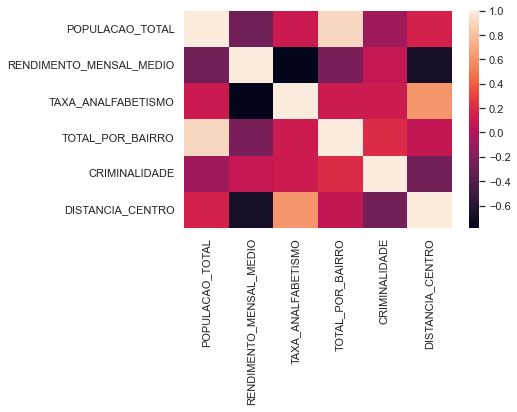

In [206]:
sns.heatmap(df_bairro_crimes2.corr())


Fazendo a análise de residuos para verificar se existe algum tipo de padrão

<AxesSubplot:>

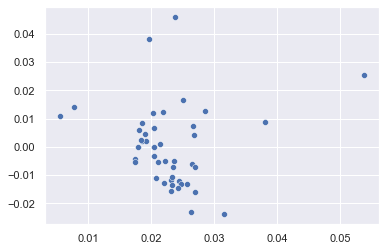

In [207]:
pred_val = response.fittedvalues.copy()
true_val = df_bairro_crimes2['CRIMINALIDADE'].values.copy()
residual = true_val - pred_val

sns.scatterplot(x = pred_val, y = residual)

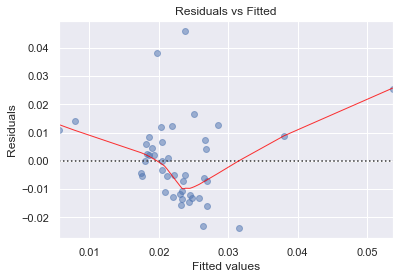

In [208]:
model_fitted_y = response.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='CRIMINALIDADE', data=df_bairro_crimes2, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

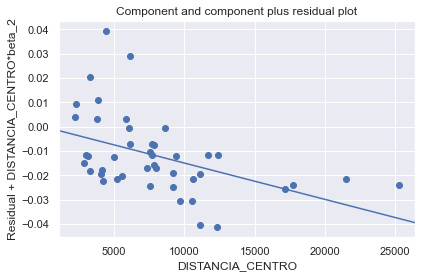

In [209]:
# residuos1 = model.resid
# fig, ax = plt.subplots(2,2,figsize=(15,6))
# residuos1.plot(title="Resíduos do modelo", ax=ax[0][0])
# sns.distplot(residuos1,ax=ax[0][1])


fig = sm.graphics.plot_ccpr(response, "DISTANCIA_CENTRO")
fig.tight_layout(pad=1.0)


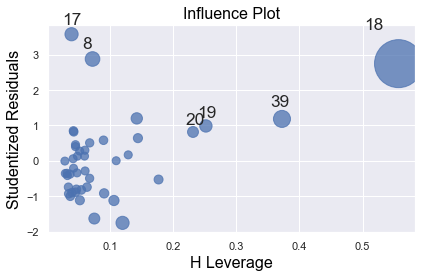

In [210]:
fig = sm.graphics.influence_plot(response, criterion="cooks")
fig.tight_layout(pad=1.0)

Verificamos um grande resíduo nos bairros de Campina do Siqueira e no bairro de Prado Velho, apesar do ponto de alavanca deles serem bem diferentes, porém não conseguimos identificar nenhum padrão.

In [211]:
df_bairro_crimes2

,ATENDIMENTO_BAIRRO_NOME,POPULACAO_TOTAL,RENDIMENTO_MENSAL_MEDIO,TAXA_ANALFABETISMO,TOTAL_POR_BAIRRO,CRIMINALIDADE,DISTANCIA_CENTRO
1,CIDADE INDUSTRIAL DE CURITIBA,172822,779.67,4.34,2994,0.017324,11084
2,CAJURU,96200,873.67,4.64,2969,0.030863,7848
3,PINHEIRINHO,50401,844.62,3.95,1214,0.024087,11665
4,XAXIM,57182,1040.56,3.07,1174,0.020531,9391
5,NOVO MUNDO,44063,1231.25,2.93,982,0.022286,7527
6,FAZENDINHA,28074,984.18,3.64,964,0.034338,8598
7,TATUQUARA,52780,590.06,6.11,952,0.018037,17171
8,HAUER,13315,1336.02,1.94,770,0.057830,6141
9,BACACHERI,23734,2216.40,1.27,766,0.032274,5859
10,UBERABA,72056,1101.82,3.51,713,0.009895,9209


In [212]:
#Policiamento/Fluxo de pessoas

---------------------------------------------------------------